In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns',None)
df = pd.read_csv('books.csv',error_bad_lines = False)   #error_bad_lines is pretty useful to deal with undesired commas inside the data that splits a single column into two new ones.
df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

# EDA

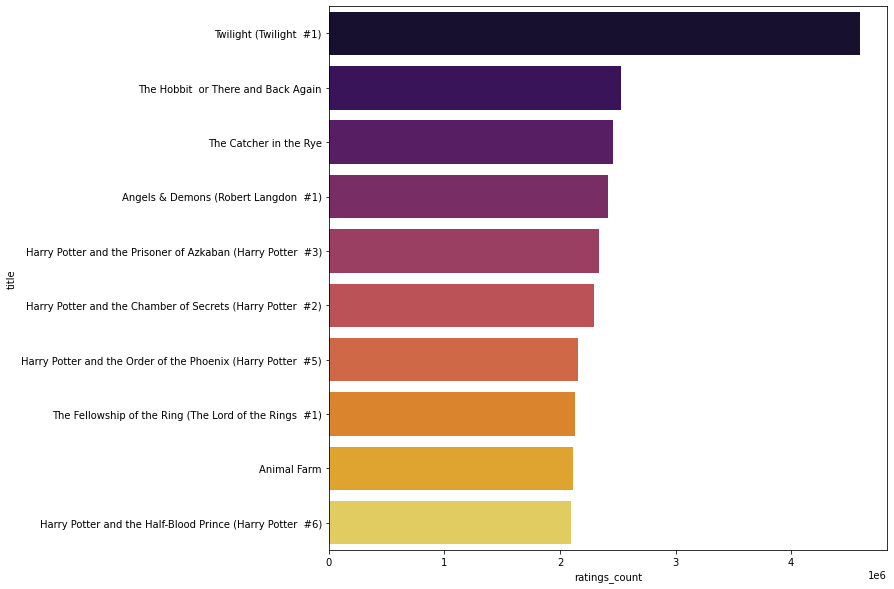

In [ ]:
#Viewing maximum ratings_count book
plt.figure(figsize=(10, 10))
rate_count=df[df['ratings_count']>100000]
data=rate_count.sort_values(by='ratings_count',ascending=False).head(10)
sns.barplot(y='title',x='ratings_count', data=data, palette='inferno')
plt.show()

                     title
authors                   
Stephen King            40
P.G. Wodehouse          40
Rumiko Takahashi        39
Orson Scott Card        35
Agatha Christie         33
Piers Anthony           30
Mercedes Lackey         29
Sandra Brown            29
Dick Francis            28
Laurell K. Hamilton     23 




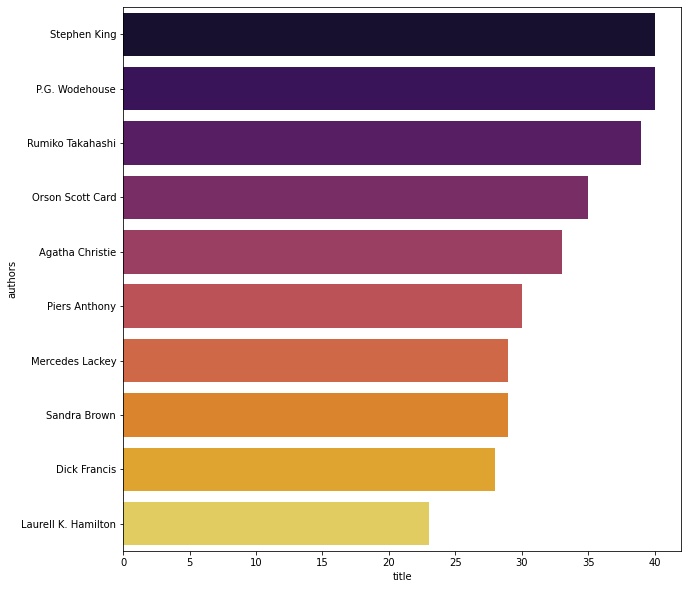

In [ ]:
plt.figure(figsize=(10,10))
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
print(most_books,'\n\n')
sns.barplot(y=most_books.index, x=most_books['title'], data=most_books, palette='inferno')
plt.show()


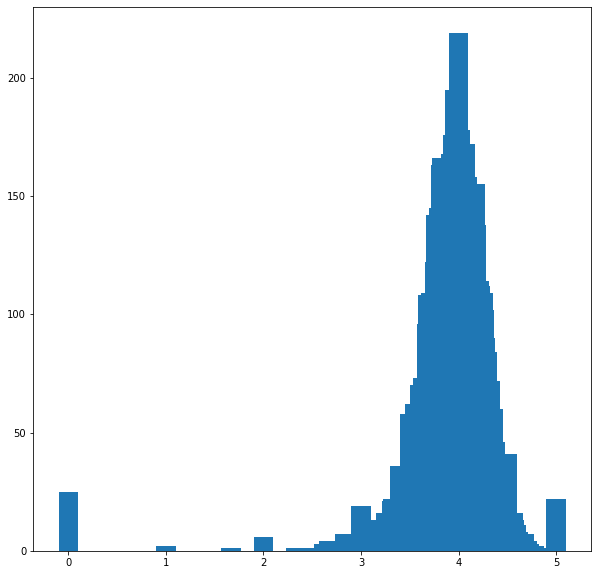

In [ ]:
#Seeing rating of books
plt.figure(figsize=(10,10))
df['average_rating']=df['average_rating'].astype("float")
rate=df['average_rating'].value_counts()
plt.bar(height=rate,x=rate.index, width=0.2)
plt.show()

In [ ]:
#checkpoint of my work
copy = df.copy()

In [ ]:
copy.loc[ (copy['average_rating'] >= 0) & (copy['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
copy.loc[ (copy['average_rating'] > 1) & (copy['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
copy.loc[ (copy['average_rating'] > 2) & (copy['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
copy.loc[ (copy['average_rating'] > 3) & (copy['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
copy.loc[ (copy['average_rating'] > 4) & (copy['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [ ]:
copy.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


In [ ]:
rating=pd.get_dummies(copy["rating_between"])
lang=pd.get_dummies(copy["language_code"])

,rating_between_between 0 and 1,rating_between_between 1 and 2,rating_between_between 2 and 3,rating_between_between 3 and 4,rating_between_between 4 and 5,language_code_ale,language_code_ara,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,language_code_enm,language_code_fre,language_code_ger,language_code_gla,language_code_glg,language_code_grc,language_code_ita,language_code_jpn,language_code_lat,language_code_msa,language_code_mul,language_code_nl,language_code_nor,language_code_por,language_code_rus,language_code_spa,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = pd.concat([rating_df, 
                      language_df, 
                      copy['average_rating'], 
                      copy['ratings_count']], axis=1)

numpy.ndarray

In [ ]:
#Scaling down the numeric values
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [ ]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = copy[copy['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(copy.loc[newid].title)
    return book_list_name
    


['The Kingdom of God Is Within You',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 "The World's Religions",
 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 "Angela's Ashes"]

In [ ]:
print("Welcome to Book Recommendation System")
book=input("\n\nEnter book name\n\n")
BookNames = BookRecommender(book)
#'The Kingdom of God Is Within You
for num,books in enumerate(BookNames,1):
  print(num,books,'\n') 

Welcome to Book Recommendation System


Enter book name

The Kingdom of God Is Within You
1 The Kingdom of God Is Within You 

2 Harry Potter and the Chamber of Secrets (Harry Potter  #2) 

3 Harry Potter and the Order of the Phoenix (Harry Potter  #5) 

4 The World's Religions 

5 Harry Potter and the Half-Blood Prince (Harry Potter  #6) 

6 Angela's Ashes 

